In [2]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/d2/54/26919780384c6dd9c3108c5ca64bbe8af45ce567e2f2493cd0cb8c596b9a/fonttools-4.47.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.4 kB ? eta -:-


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rohit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Epoch 0, Loss: 0.28318958906443975
Epoch 1000, Loss: 0.2511397143814502
Epoch 2000, Loss: 0.25066250355019487
Epoch 3000, Loss: 0.25024359708410093
Epoch 4000, Loss: 0.24984909904873367
Epoch 5000, Loss: 0.2494600632875026
Epoch 6000, Loss: 0.24905796930121282
Epoch 7000, Loss: 0.2486234169721041
Epoch 8000, Loss: 0.24813475633872903
Epoch 9000, Loss: 0.2475665964491037
Epoch 0, Loss: 0.32226166596191774
Epoch 1000, Loss: 0.21381563958817623
Epoch 2000, Loss: 0.13450990321165468
Epoch 3000, Loss: 0.08129668174428109
Epoch 4000, Loss: 0.06949288396043761
Epoch 5000, Loss: 0.06594757278016507
Epoch 6000, Loss: 0.0645092822714409
Epoch 7000, Loss: 0.0638024226581366
Epoch 8000, Loss: 0.06340779423484819
Epoch 9000, Loss: 0.0631667673204834
Epoch 0, Loss: 0.3554116985980176
Epoch 1000, Loss: 0.25000116643159137
Epoch 2000, Loss: 0.25000001477417494
Epoch 3000, Loss: 0.25000000018715995
Epoch 4000, Loss: 0.250000000002371
Epoch 5000, Loss: 0.25000000000003003
Epoch 6000, Loss: 0.25000000000

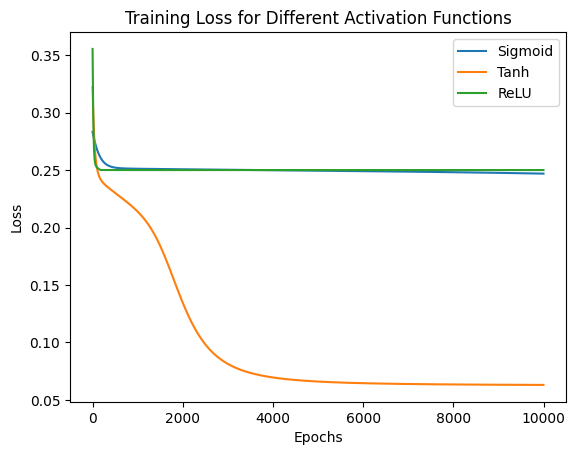

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    return np.random.randn(input_size, hidden_size), np.random.randn(hidden_size, output_size)

def forward_propagation(inputs, weights_input_hidden, weights_hidden_output, activation_fn):
    hidden_layer_output = activation_fn(np.dot(inputs, weights_input_hidden))
    output_layer_output = sigmoid(np.dot(hidden_layer_output, weights_hidden_output))
    return hidden_layer_output, output_layer_output

def backward_propagation(inputs, targets, hidden_layer_output, output_layer_output,
                         weights_input_hidden, weights_hidden_output, learning_rate, activation_derivative):
    output_error = targets - output_layer_output
    output_delta = output_error * activation_derivative(output_layer_output)
    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * activation_derivative(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate

def train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs, activation_fn, activation_derivative):
    weights_input_hidden, weights_hidden_output = initialize_weights(inputs.shape[1], hidden_size, output_size)
    loss_history = []

    for epoch in range(epochs):
        hidden_layer_output, output_layer_output = forward_propagation(inputs, weights_input_hidden, weights_hidden_output, activation_fn)
        backward_propagation(inputs, targets, hidden_layer_output, output_layer_output,
                             weights_input_hidden, weights_hidden_output, learning_rate, activation_derivative)

        loss = np.mean((targets - output_layer_output) ** 2)
        loss_history.append(loss)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights_input_hidden, weights_hidden_output, loss_history

def plot_loss_curves(*loss_histories, labels, title='Training Loss for Different Activation Functions'):
    for loss_history, label in zip(loss_histories, labels):
        plt.plot(loss_history, label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Example usage
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 10000

sigmoid_params = train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs, sigmoid, sigmoid_derivative)
tanh_params = train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs, tanh, tanh_derivative)
relu_params = train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs, relu, relu_derivative)

plot_loss_curves(sigmoid_params[2], tanh_params[2], relu_params[2], labels=['Sigmoid', 'Tanh', 'ReLU'])
